In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

students=pd.read_csv('data/StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Does the performance in the exams vary according to gender, origin and education level of parents?

## Does lunch type have a relationship with exam performances? How can you explain this, if any?

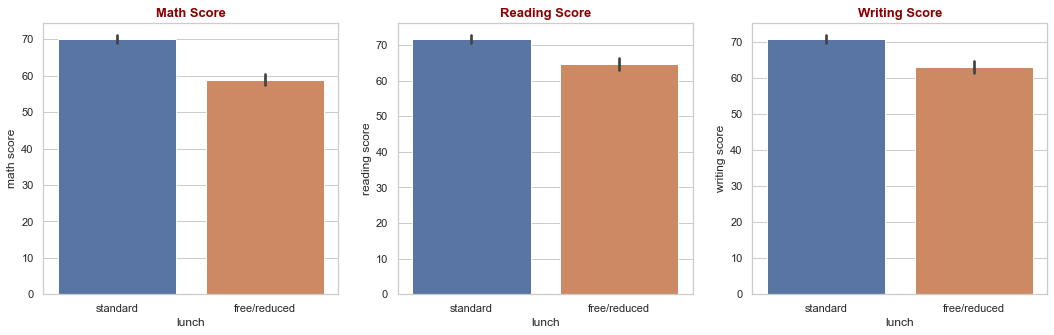

In [3]:
plt.figure(figsize=(18,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
sns.barplot(students["lunch"], students["math score"])
plt.title("Math Score", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(students["lunch"], students["reading score"])
plt.title("Reading Score", fontdict = title_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(students["lunch"], students["writing score"])
plt.title("Writing Score", fontdict = title_font)

plt.show()

## Does the preparation courses have an impact on exam performance?

In [4]:
students.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Which lessons are most correlated with each other?

In [5]:
students_corr=students.corr()
display(students_corr)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


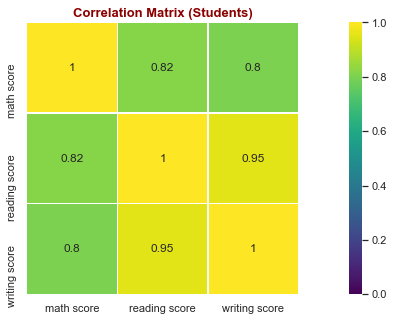

In [6]:
plt.figure(figsize=(18,5))

sns.heatmap(students_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Students)", fontdict=title_font)

plt.show()